
 vid0118_0132  | score :  1  | diagnosis :  2
Video Length =  262

Steps' peaks frame location =  {'max': [21, 72, 129, 191, 253], 'min': [0, 40, 95, 151, 212]}

---------------------------- 3 steps segmentation n° 0 ------------------------------------------------------

C_swing=  1.0
C_stance =  1.699673171197595



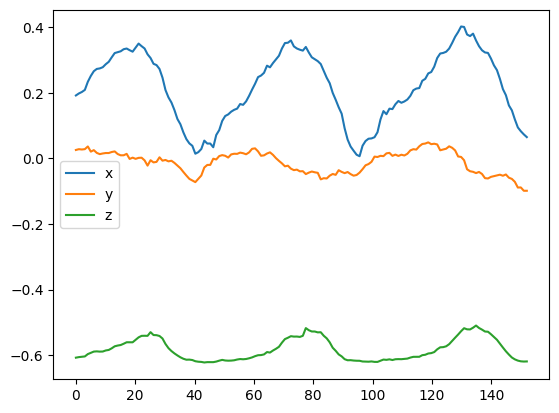

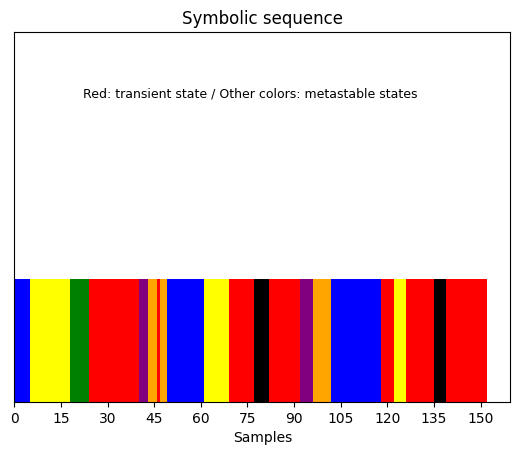

Symbolic sequence =  [1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 4. 4. 5. 5. 5. 0. 5.
 5. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0.
 0. 0. 0. 0. 0. 6. 6. 6. 6. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 4. 4. 4.
 5. 5. 5. 5. 5. 5. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 6. 6. 6. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]

Leg length =  76.49 cm

C_stepperiod =  66.2414088639421
C_aplhabet-size =  7
C_Number-of-words =  21

Number of appearances:  [3, 3, 1, 2, 2, 2]

C_appearance =  1.6666666666666665

Serie segmented:  [[1, 2, 3, 0], [4, 5, 0, 5, 1, 2, 0, 6, 0], [4, 5, 1, 0, 2, 0, 6, 0]]
States appearances =  {1: 3, 2: 3, 3: 1000, 0: 1000, 4: 2, 5: 2, 6: 2}
Center frame positions =  {1: [2.0, 54.5, 109.5], 2: [11.0, 64.5, 123.5], 3: [20.5], 0: [31.5, 46.0, 72.5, 86.5, 119.5, 130.0, 145.0], 4: [41.0, 93.5], 5: [45.4, 98.5], 6: 

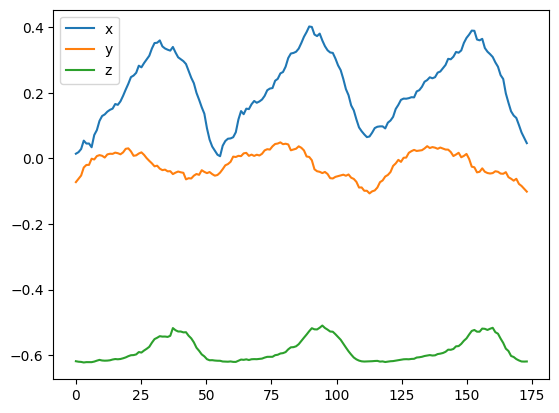

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\gauth\AppData\Local\Temp\ipykernel_164772\2255978709.py", line 215, in <module>
    epsi = opti_epsi.epsi_entropy(y, step)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\RASCoPy\opti_epsi.py", line 32, in epsi_entropy
    Serie = symbolic_series.symbolic_serie(R)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gauth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\RASCoPy\symbolic_series.py", line None, in symbolic_serie
KeyboardInterrupt

During handl

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from plotly.subplots import make_subplots
import os
from RASCoPy import recurrence, opti_epsi, symbolic_series
import sys
sys.path.insert(0, os.getcwd())
import joblib
import pandas as pd
import math
import copy

# Search if a symbolic pattern is in a symbolic sequence
def pattern_in_serie(w, s):
    w_str = ''
    s_str = ''
    for a in w:
        w_str=w_str+str(a)
    for b in s:
        s_str = s_str+str(b)
    return s_str in w_str

# Extract data from a .json file
name = "data_20-03"
data = joblib.load(name+".json")

if all(isinstance(valeur, dict) for valeur in data.values()):
    passer = 0
    # Run the code for all videos in the .json
    for videoname in data:
        # "Passer" is for skip one or multiple videos of the .json
        """if videoname == 'vid0078_0063b':
            passer = 0
        else:
            passer=1"""
        # Data name extraction from .json and Gait/diagnosis information from .xslx
        vidname = data[videoname]
        donnees = pd.read_excel('label_info_120.xlsx')
        ligne = donnees.loc[donnees['vidname'] == videoname]
        diagno = ligne['diag'].values[0]
        scor = ligne['score'].values[0]

        # -------------------------------------------------------------- Dataset creation -------------------------------------------------------------------------------------
        if passer == 0 and videoname!='vid0131_0157':
            print("\n", videoname," | score : ",scor," | diagnosis : ",diagno)
            data_final=np.array(vidname['joints3D'])
            x = np.zeros((data_final.shape[1], data_final.shape[0], data_final.shape[2]))
            for k in range(data_final.shape[1]):
                x[k,:,0]=data_final[:,k,2]
                x[k,:,1]=data_final[:,k,0]
                x[k,:,2]=data_final[:,k,1]
            x[:, :, 2] *= -1
            x[:, :, 1] *= -1
        # ------------------------------------------------- Data preprocessing specific to "data_20-03.json" file ------------------------------------------------------------
            if videoname == 'vid0106_0111':
                x = x[:,:176,:]
            if videoname == 'OAW02-bottomA2':
                x = x[:,10:,:]
            if videoname == 'vid0119_0133':
                x = x[:,:180,:]
            if videoname == 'vid0119_0134':
                x=x[:,5:,:]
            if videoname == 'vid0136_0167':
                x=x[:,10:,:]
            if videoname == 'vid0077_0061b':
                x = np.delete(x, 379, axis=1)
            if videoname == 'vid0078_0063b':
                x=x[:,100:,:]

        # --------------------------------------------------------------------------------------------------------------------------------------------------------------
        # -------------------------------------------------------------------- Joints selection ------------------------------------------------------------------------
        # --------------------------------------------------------------------------------------------------------------------------------------------------------------
            ankle_side = 14 # Choose the ankle side to be the reference's joint for the 3-steps normalization
            joints = [12,13,ankle_side] # Choose the joints you want to analyze

            yy = x[joints,:,:] # Creation of the dataset to analyze 
        # --------------------------------------------------------------------------------------------------------------------------------------------------------------
        # --------------------------------------------------------------------------------------------------------------------------------------------------------------
        # --------------------------------------------------------------------------------------------------------------------------------------------------------------
            
            # Leg length calculation for 
            leg_length = math.sqrt((x[joints[0],0,0]-x[joints[1],0,0])**2+(x[joints[0],0,1]-x[joints[1],0,1])**2+(x[joints[0],0,2]-x[joints[1],0,2])**2)+math.sqrt((x[joints[1],0,0]-x[joints[2],0,0])**2+(x[joints[1],0,1]-x[joints[2],0,1])**2+(x[joints[1],0,2]-x[joints[2],0,2])**2)

            # Video frame length information
            yy = np.reshape(yy.transpose(1, 0, 2), (yy.shape[1], yy.shape[0]*yy.shape[2]))
            print("Video Length = ", yy.shape[0])
            print("")
            y=yy.copy()

            # -------------------------- Solving video orientation problems specific to "data_20-03.json" file -------------------------------------------
            xcoord = 0
            if videoname != 'vid0119_0133' and videoname != 'vid0119_0134' and videoname != 'vid0111_0121' and videoname != 'vid0103_0106' and videoname != 'vid0078_0063b' and videoname != 'vid0090_0085' and videoname != 'vid0089_0083' and videoname != 'vid0099_0097': 
                j=40
                xcoord_tab = [0,0,0]
                ypics = x[ankle_side,:,:]
                while j < ypics.shape[0]:
                    ecart = []
                    for i in range(3): # Search for the maximum variations in each coordinate of the ankle's movements
                        maxi = ypics[:,i].max()
                        mini = ypics[:,i].min()
                        ecart.append(maxi-mini)
                    xcoord_tab[np.argmax(ecart)] = xcoord_tab[np.argmax(ecart)]+1
                    j=j+40
                xcoord = np.argmax(xcoord_tab) # The coordinates with biggest variations is the X coordinate (front-back axis of the ankle moves the most)

                # Preparing steps' peak detection with correct video reorientation 
                ypeak = x[ankle_side,:,:]
                ypeak[:,0] = ypics[:,xcoord]
            # -----------------------------------------------------------------------------------------------------------------------------------------------
            else:
                # Preparing steps' peak detection in normal case
                ypics = x[ankle_side,:,:]
                ypeak = x[ankle_side,:,:] 
            
            maxp,minp,locp = opti_epsi.nbr_peaks(ypeak) # Steps' peaks detection

            # ---------------------------------------- Detection problems in some noisy video -------------------------------------------------------------
            if videoname == 'vid0077_0061b' and set(ypics.flatten().tolist()) == set(x[14,:,:].flatten().tolist()):
                locp['min'] = [0, 32, 78, 123, 163, 205, 245, 292, 328, 357, 392, 440, 469]
                locp['max'] = [7, 57, 93, 139, 180, 221, 263, 305, 340, 377, 414, 458]
            if videoname == 'vid0091_0087' and set(ypics.flatten().tolist()) == set(x[14,:,:].flatten().tolist()):
                locp['max'] = [6,40,82,124,165,190,208,241]
                locp['min'] = [25,62,110,152,184,195,327,246]
            if videoname == 'vid0099_0097' and set(ypics.flatten().tolist()) == set(x[14,:,:].flatten().tolist()):
                locp['max'][-1] = 187
            if videoname == 'vid0111_0121' and set(ypics.flatten().tolist()) == set(x[14,:,:].flatten().tolist()):
                locp['max'] = [20, 74, 121, 163, 225]
                locp['min'] = [43, 93, 135, 181]
            if videoname == 'vid0078_0064' and set(ypics.flatten().tolist()) == set(x[18,:,:].flatten().tolist()):
                locp['max'] = [2, 27, 71, 116, 161, 203, 233, 253, 299, 342, 388]
                locp['min'] = [16, 54, 101, 147, 194, 221, 240, 278, 330, 373]
            if videoname == 'vid0079_0065' and set(ypics.flatten().tolist()) == set(x[18,:,:].flatten().tolist()):
                locp['max'] =[12, 59, 116, 163, 196, 221, 247, 274, 299]
            if videoname == 'vid0107_0114' and set(ypics.flatten().tolist()) == set(x[18,:,:].flatten().tolist()):
                locp['max'] == [5, 70, 138, 214, 327]
                locp['min'] = [24, 95, 162, 240, 351]
            if videoname == 'vid0111_0121' and set(ypics.flatten().tolist()) == set(x[18,:,:].flatten().tolist()):
                locp['max'] = [8, 55, 104, 165, 226]
            print("Steps' peaks frame location = ",locp)
            print("")
            # -------------------------------------------------------------------------------------------------------------------------------------------

            if len(locp['max'])>=4 or len(locp['min'])>=4: # Keeps only three steps videos or more
                first=min(min(locp['max']),min(locp['min'])) # Looking if the video starts with a swing ('min') or a stance ('max') phase

            # -------------------------------------------------------- Three steps normalization ---------------------------------------------------------
                if first in locp['max']:
                    nbr_rep = len(locp['max'])
                if first in locp['min']:
                    nbr_rep = len(locp['min'])

                for iii in range(nbr_rep-3):
                        print("---------------------------- 3 steps segmentation n°",iii,"------------------------------------------------------")
            # -------------------------------------------------------------------------------------------------------------------------------------------

            # ----------------------------------------------------------- C_stance & C_swing ------------------------------------------------------------
                        stance = []
                        swing = []
                        if first in locp['max']:
                            if len(locp['min'])==len(locp['max']) or len(locp['min'])==len(locp['max'])-1:
                                for i in range(len(locp['min'][iii:iii+3])):
                                    if (locp['min'][i+iii] != locp['min'][-1] or locp['min'][-1] < locp['max'][-1]) and (locp['max'][i+iii] != locp['max'][0]):
                                        stance.append(abs(locp['min'][i+iii]-locp['max'][i+iii]))
                                    if (len(locp['min'])==len(locp['max']) and i!=len(locp['min'])-1) or (len(locp['min'])==len(locp['max'])-1):
                                        if locp['max'][i+iii+1] != locp['max'][-1] or locp['max'][-1] < locp['min'][-1]:
                                            swing.append(abs(locp['max'][i+iii+1]-locp['min'][i+iii]))
                        if first in locp['min']:
                            if len(locp['min'])==len(locp['min']) or len(locp['max'])==len(locp['min'])-1:
                                for i in range(len(locp['max'][iii:iii+3])):
                                    if (len(locp['max'])==len(locp['min']) and i!=len(locp['max'])-1) or (len(locp['max'])==len(locp['min'])-1):
                                        if locp['min'][i+iii+1] != locp['min'][-1] or locp['min'][-1] < locp['max'][-1]:
                                            stance.append(abs(locp['max'][i+iii]-locp['min'][i+iii+1]))
                                    if (locp['max'][i+iii] != locp['max'][-1] or locp['max'][-1] < locp['min'][-1]) and (locp['min'][i+iii]!=locp['min'][0]):
                                        swing.append(abs(locp['min'][i+iii]-locp['max'][i+iii]))
                        C_swing = np.std(swing)
                        C_stance = np.std(stance)
                        print("")
                        print("C_swing= ",C_swing)
                        print("C_stance = ",C_stance)
                        print("")
            # -------------------------------------------------------------------------------------------------------------------------------------------

            # ----------------------------------------------------------- Time series plot --------------------------------------------------------------
                        if first in locp['max']:
                            y=yy[locp['max'][iii]:locp['max'][iii+3]+1,:]
                            T=ypics[locp['max'][iii]:locp['max'][iii+3]+1].shape[0]
                            size = 3
                            l = np.linspace(0,T,T)
                            figu = plt.figure()
                            plt.plot(l,ypics[locp['max'][iii]:locp['max'][iii+3]+1,0],label='x')
                            plt.plot(l,ypics[locp['max'][iii]:locp['max'][iii+3]+1,1],label='y')
                            plt.plot(l,ypics[locp['max'][iii]:locp['max'][iii+3]+1,2],label='z')
                            plt.legend()
                            plt.show(block=False)
                        if first in locp['min']:
                            y=yy[locp['min'][iii]:locp['min'][iii+3]+1,:]
                            T=ypics[locp['min'][iii]:locp['min'][iii+3]+1].shape[0]
                            size = 3
                            l = np.linspace(0,T,T)
                            figu = plt.figure()
                            plt.plot(l,ypics[locp['min'][iii]:locp['min'][iii+3]+1,0],label='x')
                            plt.plot(l,ypics[locp['min'][iii]:locp['min'][iii+3]+1,1],label='y')
                            plt.plot(l,ypics[locp['min'][iii]:locp['min'][iii+3]+1,2],label='z')
                            plt.legend()
                            plt.show(block=False)
            # -------------------------------------------------------------------------------------------------------------------------------------------


            # -------------------------------------------------------------------------------------------------------------------------------------------
            # ---------------------------------------------------- Recurrence Analysis ------------------------------------------------------------------ 
            # -------------------------------------------------------------------------------------------------------------------------------------------
                        step=0.001
                        epsi = opti_epsi.epsi_entropy(y, step)
                        R = recurrence.rec_mat(y,epsi)
                        serie = symbolic_series.symbolic_serie(R)
                        symbolic_series.colored_sym_serie(serie,y)
                        print("Symbolic sequence = ",serie)
                        print("")
            # -------------------------------------------------------------------------------------------------------------------------------------------
            # -------------------------------------------------------------------------------------------------------------------------------------------
            # -------------------------------------------------------------------------------------------------------------------------------------------


            # ----------------------------------------------------- Trajectory visualisation ------------------------------------------------------------
                        """palette = ['red', 'blue', 'yellow', 'green', 'purple', 'orange', 'black', 'pink', 'brown', 'gray', 'turquoise', 'indigo', 'beige', 'olive', 'cyan', 'magenta', 'gold', 'silver', 'coral', 'lavender', 'chartreuse', 'orangered', 'aquamarine', 'skyblue', 'pumpkin', 'emerald']
                        if len(palette) > np.max(serie) :
                                figure = plt.figure()
                                plt.title("Colored 3D trajectory")
                                plt.axis('off')
                                ax = figure.add_subplot(111, projection='3d')
                                ax.scatter(ypics[locp['max'][iii], 0],ypics[locp['max'][iii],1],ypics[locp['max'][iii],2], color=palette[int(serie[0])], marker='o')
                                for i in range(serie.shape[0]-1):
                                    ax.scatter(ypics[locp['max'][iii]+i+1, 0],ypics[locp['max'][iii]+i+1,1],ypics[locp['max'][iii]+i+1,2], color=palette[int(serie[i+1])], marker='o')
                                    if serie[i+1]==0:
                                        ax.plot(ypics[locp['max'][iii]+i:locp['max'][iii]+i+2, 0],ypics[locp['max'][iii]+i:locp['max'][iii]+i+2,1],ypics[locp['max'][iii]+i:locp['max'][iii]+i+2,2], color='red')
                                    else:
                                        ax.plot(ypics[locp['max'][iii]+i:locp['max'][iii]+i+2, 0],ypics[locp['max'][iii]+i:locp['max'][iii]+i+2,1],ypics[locp['max'][iii]+i:locp['max'][iii]+i+2,2], color=palette[int(serie[i])])
                                ax.text2D(0.5, -0.1, "Red: transient state / Other colors: metastable states", transform=ax.transAxes, fontsize=9, ha='center', va='center')
                                ax.set_xlabel('X')
                                ax.set_ylabel('Y')
                                ax.set_zlabel('Z')

                                figure2 = plt.figure()
                                plt.title("Colored X axis time serie")
                                plt.scatter(0,ypics[locp['max'][iii], 0], color=palette[int(serie[0])], marker='o')
                                plt.scatter(0,ypics[locp['max'][iii], 2], color=palette[int(serie[0])], marker='o')
                                for i in range(serie.shape[0]-1):
                                    plt.scatter(i+1,ypics[locp['max'][iii]+i+1, 0], color=palette[int(serie[i+1])], marker='o')
                                    plt.scatter(i+1,ypics[locp['max'][iii]+i+1, 2], color=palette[int(serie[i+1])], marker='o')
                                    if serie[i+1]==0:
                                        plt.plot([i,i+1],ypics[locp['max'][iii]+i:locp['max'][iii]+i+2, 0], color='red')
                                        plt.plot([i,i+1],ypics[locp['max'][iii]+i:locp['max'][iii]+i+2, 2], color='red')
                                    else:
                                        plt.plot([i,i+1],ypics[locp['max'][iii]+i:locp['max'][iii]+i+2, 0], color=palette[int(serie[i])])
                                        plt.plot([i,i+1],ypics[locp['max'][iii]+i:locp['max'][iii]+i+2, 2], color=palette[int(serie[i])])
                                plt.xlabel('X')
                                plt.ylabel('Y')"""
            # -------------------------------------------------------------------------------------------------------------------------------------------
                        
                        # C_stepperiod
                        C_stepperiod = (y.shape[0]/size)/leg_length
                        print("Leg length = ",round(round(leg_length,4)*100,2),"cm")
                        print("")
                        print("C_stepperiod = ",C_stepperiod)

                        # C_aplhabet-size
                        alphabet_size = len(np.unique(serie))
                        print("C_aplhabet-size = ",alphabet_size)

                        # -------------------------------- C_Number-of-words -----------------------------------------
                        a = 0
                        b = 0
                        W_nw = []
                        for i in range(len(serie)-1):
                            w = ''
                            if serie[i] != serie[i+1]:
                                for j in range(a, i+1, 1):
                                    w = w + str(int(serie[j]))
                                W_nw.append(w)
                                a = i + 1
                            if i == len(serie)-2:
                                for j in range(a, i+2, 1):
                                    w = w + str(int(serie[j]))
                                W_nw.append(w)
                        unique = set(W_nw)
                        C_nbr_words = len(unique)
                        print("C_Number-of-words = ",C_nbr_words)
                        # -------------------------------------------------------------------------------------------

                        # ----------------------------------------- C_arms ------------------------------------------
                        if (6 in joints or 10 in joints) and 2 not in joints: # If there are only arms joints in the analysis
                            ideb = 0
                            amplitude = []
                            if 6 in joints: # Default: take the left wrist into account
                                side = 6
                            elif 10 in joints: # Otherwise, take the right wrist
                                side = 10
                            # Searching for max amplitude in each step
                            if first in locp['min']:
                                for ifin in locp['min'][iii+1:iii+4]:
                                    amplitude.append(abs(max(x[side,ideb:ifin,xcoord])-min(x[side,ideb:ifin,xcoord])))
                                    ideb = ifin
                            elif first in locp['max']:
                                for ifin in locp['max'][iii+1:iii+4]:
                                    amplitude.append(abs(max(x[side,ideb:ifin,xcoord])-min(x[side,ideb:ifin,xcoord])))
                                    ideb = ifin
                            aberrant = max(amplitude) #Removing the maximum amplitude to avoid data errors due to noise 
                            s_amplitude = 0
                            cnt=0
                            for i in amplitude:
                                if i != aberrant:
                                    s_amplitude = s_amplitude+i
                                    cnt = cnt+1
                            C_arms = s_amplitude/cnt # Mean maximum amplitude of each step
                            print("C_arms = ",C_arms)
                        # -------------------------------------------------------------------------------------------


                # ---------------------------------------- Finding center frame of each metastable states appearances  -----------------------------------------
                        stock=[]
                        countarg={}
                        if 0 in serie:
                            k=np.zeros(len(np.unique(serie)))
                        else:
                            k=np.zeros(len(np.unique(serie))+1)
                        k=k.astype(int)
                        serie = serie.astype(int)
                        stockarg = {} # This contains the center frame position of each metastable states appearance

                        temp = serie[0]
                        indic_zero=[]
                        c_z=0
                        c_s1=0
                        c_s2=0
                        aaa=0
                        
                        for i in range (len(serie)-1):
                            if serie[i]==0 and serie[i+1]==temp and temp!=0:
                                aaa=1
                            if serie[i]==0:
                                c_z = c_z+1
                            if serie[i]!=0 and aaa==0:
                                c_s1=c_s1+1
                            if serie[i]!=0 and aaa==1:
                                c_s2=c_s2+1
                            if aaa==1 and serie[i]==temp and serie[i+1]!=serie[i]:
                                if c_z>=0.8*(C_stepperiod*leg_length -(c_s1+c_s2)):
                                    indic_zero.append(1)
                                else:
                                    indic_zero.append(0)
                                c_z=0
                                c_s1=c_s2
                                aaa=0
                                c_s2=0
                            if aaa==0 and serie[i+1]!=0 and serie[i+1]!=serie[i] and serie[i+1]!=temp:
                                temp=serie[i+1]
                                c_z=0
                                c_s1=0
                                c_s2=0
                            if i == len(serie)-2:
                                if aaa==1 and serie[i+1]==temp:
                                    c_s2=c_s2+1
                                    if c_z>=0.8*(C_stepperiod*leg_length -(c_s1+c_s2)):
                                        indic_zero.append(1)
                                    else:
                                        indic_zero.append(0)

                        for i in range (1,len(serie)):
                            if serie[i-1] in stockarg:
                                if 0 <= k[serie[i-1]] < len(stockarg[serie[i-1]]):
                                    stockarg[serie[i-1]][k[serie[i-1]]]=stockarg[serie[i-1]][k[serie[i-1]]]+i-1
                                    countarg[serie[i-1]][k[serie[i-1]]]=countarg[serie[i-1]][k[serie[i-1]]]+1
                                else:
                                    stockarg[serie[i-1]].append(i-1)
                                    countarg[serie[i-1]].append(1)    
                            else:
                                stockarg[serie[i-1]]=[]
                                stockarg[serie[i-1]].append(i-1)
                                countarg[serie[i-1]]=[]
                                countarg[serie[i-1]].append(1)

                            if serie[i]!=serie[i-1]:
                                stock.append(serie[i-1])
                                if i == len(serie)-1:
                                    stock.append(serie[i])
                                    if serie[i] in stockarg:
                                        stockarg[serie[i]].append(i)
                                        countarg[serie[i]].append(1)
                                    else:
                                        stockarg[serie[i]]=[]
                                        stockarg[serie[i]].append(i)
                                        countarg[serie[i]]=[]
                                        countarg[serie[i]].append(1)
                                if serie[i-1] in stock:
                                    k[serie[i-1]]=k[serie[i-1]]+1

                            if i == len(serie)-1 and serie[i]==serie[i-1]:
                                stock.append(serie[i])
                                stockarg[serie[i]][k[serie[i]]]=stockarg[serie[i]][k[serie[i]]]+i
                                countarg[serie[i]][k[serie[i]]]=countarg[serie[i]][k[serie[i]]]+1

                        if 0 in serie:
                            k=np.zeros(len(np.unique(stock)))
                        else:
                            k=np.zeros(len(np.unique(stock))+1)
                        k=k.astype(int)
                        iz=0
                        for i in range(len(stock)-2):
                            k[stock[i]] = k[stock[i]]+1
                            if stock[i]!=0 and stock[i]==stock[i+2] and stock[i+1] == 0:
                                if indic_zero[iz]==0:
                                    stockarg[stock[i]][k[stock[i]]-1] = stockarg[stock[i]][k[stock[i]]-1] + stockarg[stock[i]][k[stock[i]]]
                                    stockarg[stock[i]].pop(k[stock[i]])
                                    countarg[stock[i]][k[stock[i]]-1] = countarg[stock[i]][k[stock[i]]-1] + countarg[stock[i]][k[stock[i]]]
                                    countarg[stock[i]].pop(k[stock[i]])
                                    k[stock[i]]=k[stock[i]]-1
                                iz=iz+1

                        """print("stockarg = ",stockarg)
                        print("countarg = ",countarg)"""

                        for key in stockarg:
                            for val in range(len(stockarg[key])):
                                stockarg[key][val] = stockarg[key][val]/countarg[key][val]
                # ------------------------------------------------------------------------------------------------------------------------------------------
                        
                        # Calculation of the frame distance between each metastable state
                        distance={} 
                        for key in stockarg: 
                            if key!=0:
                                for val in range(len(stockarg[key])-1):
                                    dist=stockarg[key][val+1]-stockarg[key][val]
                                    if key in distance:
                                        distance[key].append(dist)
                                    else:
                                        distance[key]=[]
                                        distance[key].append(dist)

                        # Calculate the number of state's appearances
                        f=[]
                        for key in stockarg:
                            if key!=0:
                                f.append(len(stockarg[key]))
                        print("")
                        print("Number of appearances: ", f)
                        print("")
                
                        # ----------------------------------------------- C_appearance ---------------------------------------------------
                        erreur_rec = []
                        for i in f:
                            if i<3:
                                err = abs(i-3)/3
                            elif i>4:
                                err = abs(i-4)/4
                            else:
                                err = 0
                            erreur_rec.append(err)
                        #print(erreur_rec)
                        C_appearance = 0
                        for i in erreur_rec:
                            C_appearance = C_appearance+i
                        print("C_appearance = ",C_appearance)
                        # ----------------------------------------------------------------------------------------------------------------

                # ---------------------------------------------------- Symbolic Sequence segmentation step by step ------------------------------------------------------
                        serie=np.array(serie)
                        serie_seg = []
                        if first in locp['max']:
                            ideb = locp['max'][iii]
                            for ifin in locp['max'][iii+1:iii+4]:
                                s_s = serie[ideb-locp['max'][iii]:ifin-locp['max'][iii]]
                                se_se = []
                                for k in s_s:
                                    if k not in se_se:
                                        se_se.append(k)
                                    elif k!=se_se[-1]:
                                        se_se.append(k)
                                s_s = se_se
                                if ideb!=locp['max'][iii] and serie_seg != [] and s_s[0] == serie_seg[-1][-1]:
                                    if (serie_seg[-1][-1] == serie_seg[-1][0]) or (serie_seg[-1][-1] == serie_seg[-1][1] and serie_seg[-1][0]==0):
                                        serie_seg[-1].pop(-1)
                                        serie_seg.append(s_s)
                                    elif s_s[1:]!=[]:
                                        serie_seg.append(s_s[1:])
                                else:
                                    serie_seg.append(s_s)
                                ideb=ifin
                        else:
                            ideb = locp['min'][iii]
                            for ifin in locp['min'][iii+1:iii+4]:
                                s_s = serie[ideb-locp['min'][iii]:ifin-locp['min'][iii]]
                                se_se = []
                                for k in s_s:
                                    if k not in se_se:
                                        se_se.append(k)
                                    elif k!=se_se[-1]:
                                        se_se.append(k)
                                s_s = se_se
                                if ideb!=locp['min'][iii] and serie_seg != [] and s_s[0] == serie_seg[-1][-1]:
                                    if (serie_seg[-1][-1] == serie_seg[-1][0]) or (serie_seg[-1][-1] == serie_seg[-1][1] and serie_seg[-1][0]==0):
                                        serie_seg[-1].pop(-1)
                                        serie_seg.append(s_s)
                                    elif s_s[1:]!=[]:
                                        serie_seg.append(s_s[1:])
                                else:
                                    serie_seg.append(s_s)
                                ideb=ifin
                # -------------------------------------------------------------------------------------------------------------------------------------------------

                        # Removing useless first states if necessary 
                        for i in serie_seg:
                            for j in serie_seg:
                                if j != i and len(i)>1 and len(j)>0 and i[-1]==j[0]:
                                    i[-1]=0
                        print("")            
                        print("Serie segmented: ", serie_seg) # Segmented symbolic serie on each step

                # ----------------------------------- Searching for states that appears exactly 3 times in the symbolic sequence ----------------------------------
                        f1={}
                        for indice, i in enumerate(serie_seg):
                            for j in i:
                                ok = 0
                                if i.count(j)==2 and j!=0:
                                    for m in range(len(i)-2):
                                        if i[m] == j and i[m+1] == 0 and i[m+2] == j:
                                            ok = 1
                                            i[m+2] = 0
                                    if i[0]==j and i[-1]==j:
                                        ok=1
                                        if i!=serie_seg[-1] and serie_seg[indice+1][0]!=j:
                                            serie_seg[indice+1].insert(0,j)
                                        i[-1]==0
                                    if (i[0]==0 and i[1]==j) and (i[-1]==j or (i[-1]==0 and i[-2]==j)) or (i[0] == j and (i[-2] == j and i[-1] == 0)):
                                        ok = 1
                                        if i[-2]==j:
                                            if j in f1:
                                                f1[j] = f1[j]+1
                                            else:
                                                f1[j]=1
                                        elif i[-1]==j and i!=serie_seg[-1] and serie_seg[indice+1][0]!=j:
                                            serie_seg[indice+1].insert(0,j)
                                        premier_indice = i.index(j)
                                        deuxieme_indice = i.index(j, premier_indice + 1)
                                        i[deuxieme_indice] = 0
                                if i.count(j)==3 and j!=0:
                                    for m in range(len(i)-4):
                                        if i[m] == j and i[m+1] == 0 and i[m+2] == j and i[m+3] == 0 and i[m+4] == j:                                               
                                            ok = 1
                                            i[m+2] = 0
                                            i[m+4] = 0

                                if j!=0 and (i.count(j)==1 or ok==1):
                                    if j in f1:
                                        f1[j] = f1[j]+1
                                    else:
                                        f1[j]=1
                                else:
                                    f1[j] = 1000
                                for k in f1:
                                    if k not in i and f1[k] <= indice:
                                        f1[k] = 1000
                        print("States appearances = ",f1)
                        print("Center frame positions = ", stockarg)
                        print("Distance between states = ",distance) 
                        print("")
                # -----------------------------------------------------------------------------------------------------------------------------------

                # -------------------------------------------------- C_deviation --------------------------------------------------------------------
                        etype={}
                        for h in f1:
                            if f1[h] >= 3 and f1[h]<5 and h<len(distance):
                                ecart_type = np.std(distance[h])
                                etype[h] = ecart_type
                            elif f1[h]==5 and f[h] < 5:
                                ecart_type = np.std(distance[h])
                                etype[h] = ecart_type
                        if len(etype)!=0:
                            C_deviation=0
                            for key in etype:
                                C_deviation = C_deviation+etype[key]
                            C_deviation = C_deviation/len(etype)
                            print("C_deviation = ",C_deviation)
                        else:
                            C_deviation = 100
                            print("C_deviation = Impossible")
                # -----------------------------------------------------------------------------------------------------------------------------------

                        # ------------------------------------- Symbolic serie with states merged in a unique symbol --------------------------------
                        serie = np.array(serie)
                        serie = serie.astype(int)
                        order = [] # Order = Symbolic serie with states merged in 1 symbol
                        for i in range(len(serie)-1):
                            if i == 0:
                                order.append(serie[i])
                            if serie[i]!=serie[i+1]:
                                order.append(serie[i+1])
                        print("")
                        print("New symbolic sequence = ",order)
                        print("")
                        # --------------------------------------------------------------------------------------------------------------------------

                        # -------------------------------------------------------------- C_Lempel-Ziv ----------------------------------------------
                        C_LZ = 0
                        i = 0
                        W_LZ = []
                        W_LZ.append(order[i])
                        i = 1
                        while i < len(order):
                            j = i
                            Bool = pattern_in_serie(W_LZ[:j], str(order[j]))
                            if Bool == False:
                                W_LZ.append(str(order[i]))
                                i = i + 1
                            else:
                                while Bool == True:
                                    j = j + 1
                                    if j >= len(order):
                                        break
                                    Bool = pattern_in_serie(W_LZ[:j], order[i:j + 1])
                                W_LZ.append(''.join(map(str, order[i:j + 1])))
                                i = j + 1
                        C_LZ = len(W_LZ)
                        C_LZ_n = C_LZ/len(order)
                        print("C_Lempel-Ziv = ",C_LZ)
                        # --------------------------------------------------------------------------------------------------------------------------

                        #----------------------------------------------------- C_2 -----------------------------------------------------------------
                        a=0
                        C_2 = 0
                        ser = order.copy()
                        w_ser = ser.copy()
                        # Searching for maximum length's recurrent serie
                        while(len(ser)!=0): 
                            max_serie = ''
                            best_max_serie = ''
                            j=0
                            i=0
                            i2=0
                            while i < len(ser):
                                if str(ser[i]) != '0' and str(ser[i]) not in max_serie:
                                    max_serie = max_serie+str(ser[i])
                                    ser_str = ''
                                    for p in ser:
                                        ser_str=ser_str+str(p)
                                    count=0 
                                    rec=0
                                    if max_serie in ser_str:
                                        rec=ser_str.count(max_serie)
                                    if len(max_serie)>len(best_max_serie) and rec>1 and len(max_serie)<=len(ser)/2:
                                        best_max_serie = max_serie
                                        i=j
                                    elif len(max_serie)>=len(ser)/2 and len(max_serie)>len(best_max_serie) and rec==1:
                                        best_max_serie = max_serie
                                        i=j
                                elif str(ser[i]) == '0':
                                    max_serie = max_serie+str(ser[i])
                                    ser_str = ''
                                    for p in ser:
                                        ser_str=ser_str+str(p)
                                    count=0 
                                    rec=0
                                    if max_serie in ser_str:
                                        rec=ser_str.count(max_serie)
                                    if len(max_serie)>len(best_max_serie) and rec>1 and len(max_serie)<=len(ser)/2:
                                        best_max_serie = max_serie
                                        i=j
                                    elif len(max_serie)>len(ser)/2 and len(max_serie)>len(best_max_serie) and rec==1:
                                        best_max_serie = max_serie
                                        i=j
                                else:
                                    max_serie=''
                                    i2=i2+1
                                    i=i2-1
                                    j=i
                                i=i+1
                                j=j+1

                            for i in range(len(w_ser)):
                                c=0
                                ws = ''
                                windx = []
                                for j in range(len(best_max_serie)):
                                    if i+j < len(w_ser):
                                        if w_ser[i+j] == int(best_max_serie[j]):
                                            ws=ws+str(w_ser[i+j])
                                            windx.append(i+j)
                                            c = c+1
                                if c==len(best_max_serie):
                                    break
                            if windx != []:
                                ind = windx[0]
                            else:
                                ind = 0
                            for i in windx: 
                                w_ser.pop(i)
                                for j in range(len(windx)):
                                    windx[j]=windx[j]-1
                            C_2 = C_2+1
                            ws = ''.join(map(str, w_ser))
                            if best_max_serie in ws[:ind]:
                                ws = ws.replace(best_max_serie, '')
                                w_ser = [int(c) for c in ws]
                            if best_max_serie in ws[ind:]:
                                ws = ws.replace(best_max_serie, '')
                                w_ser = [int(c) for c in ws]
                            ser=w_ser
                            a=a+1
                        # --------------------------------------------------------------------------------------------------------------------------

                        #----------------------------------------------------- C_1 -----------------------------------------------------------------
                        C_1 = 0
                        ser = order.copy()
                        store = []
                        store_str = ''
                        i=0
                        while i < len(ser):
                            if str(ser[i]) != '0' and str(ser[i]) not in store_str:
                                store_str = store_str+str(ser[i])
                                ser.pop(i)
                            elif str(ser[i]) == '0':
                                store_str = store_str+str(ser[i])
                                ser.pop(i)
                            else:
                                store.append(store_str)
                                store_str=''
                            if len(ser) == 0:
                                store.append(store_str)
                        conf = 0
                        #print("\nstore = ",store)
                        for i in range(len(store[:-1])):
                            if store[-1] in store[i][:len(store[-1])]:
                                conf = 1
                            if store[i][0] == '0':
                                store[i] = store[i][1:]
                        if conf == 1:
                            store.pop(-1)
                        C_1 = len(np.unique(store))
                        #print("store suppr = ",store)
                        print("C_1 = ",C_1)
                        print("C_2 = ",C_2)
                        print("")
                        print("")
                        # --------------------------------------------------------------------------------------------------------------------------
                        

            # ------------------------------------------------- Save results in an excel .xlsx file ------------------------------------------------------------------
                        join = "4BPs" # Write the name of the joints combination for the excel
                        donnees = pd.read_excel('rec_analysis.xlsx')

                        if "vidname" in donnees.columns:
                            if videoname in donnees['vidname'].values:
                                donnees.loc[videoname+str(iii), "vidname"] = videoname
                                donnees.to_excel('rec_analysis.xlsx', index=False)
                            else:
                                donnees = donnees.append(pd.Series(name=videoname, dtype='float64'))
                                donnees.loc[videoname+str(iii), "vidname"] = videoname
                                donnees.to_excel('rec_analysis.xlsx', index=True)
                        else:
                            donnees["vidname"] = np.nan
                            donnees.loc[videoname+str(iii), "vidname"] = videoname
                            donnees.to_excel('rec_analysis.xlsx', index=True)

                        if "score" in donnees.columns:
                            if videoname in donnees['vidname'].values:
                                donnees.loc[videoname+str(iii), "score"] = scor
                                donnees.to_excel('rec_analysis.xlsx', index=False)
                            else:
                                donnees = donnees.append(pd.Series(name=videoname, dtype='float64'))
                                donnees.loc[videoname+str(iii), "score"] = scor
                                donnees.to_excel('rec_analysis.xlsx', index=True)
                        else:
                            donnees["score"] = np.nan
                            donnees.loc[videoname+str(iii), "score"] = scor
                            donnees.to_excel('rec_analysis.xlsx', index=True)

                        if "diag" in donnees.columns:
                            if videoname in donnees['vidname'].values:
                                donnees.loc[videoname+str(iii), "diag"] = diagno
                                donnees.to_excel('rec_analysis.xlsx', index=False)
                            else:
                                donnees = donnees.append(pd.Series(name=videoname, dtype='float64'))
                                donnees.loc[videoname+str(iii), "diag"] = diagno
                                donnees.to_excel('rec_analysis.xlsx', index=True)
                        else:
                            donnees["diag"] = np.nan
                            donnees.loc[videoname+str(iii), "diag"] = diagno
                            donnees.to_excel('rec_analysis.xlsx', index=True)

                        if join+" : C_appearance" in donnees.columns:
                            if videoname in donnees['vidname'].values:
                                donnees.loc[videoname+str(iii), join+" : C_appearance"] = round(C_appearance,2)
                                donnees.to_excel('rec_analysis.xlsx', index=False)
                            else:
                                donnees.loc[videoname] = np.nan
                                donnees.loc[videoname+str(iii), join + " : C_appearance"] = round(C_appearance, 2)
                                donnees.to_excel('rec_analysis.xlsx', index=True)
                        else:
                            donnees[join+" : C_appearance"] = np.nan
                            donnees.loc[videoname+str(iii), join+" : C_appearance"] = round(C_appearance,2)
                            donnees.to_excel('rec_analysis.xlsx', index=True)

                        if join+" : nbr_w" in donnees.columns:
                            if videoname in donnees['vidname'].values:
                                donnees.loc[videoname+str(iii), join+" : nbr_w"] = round(C_nbr_words,2)
                                donnees.to_excel('rec_analysis.xlsx', index=False)
                            else:
                                donnees.loc[videoname] = np.nan
                                donnees.loc[videoname+str(iii), join + " : nbr_w"] = round(C_nbr_words, 2)
                                donnees.to_excel('rec_analysis.xlsx', index=True)
                        else:
                            donnees[join+" : nbr_w"] = np.nan
                            donnees.loc[videoname+str(iii), join+" : nbr_w"] = round(C_nbr_words,2)
                            donnees.to_excel('rec_analysis.xlsx', index=True)

                        if  (6 in joints or 10 in joints) and 2 not in joints:
                            if join+" : C_arms" in donnees.columns:
                                if videoname in donnees['vidname'].values:
                                    donnees.loc[videoname+str(iii), join+" : C_arms"] = round(C_arms,2)
                                    donnees.to_excel('rec_analysis.xlsx', index=False)
                                else:
                                    donnees.loc[videoname] = np.nan
                                    donnees.loc[videoname+str(iii), join + " : C_arms"] = round(C_arms, 2)
                                    donnees.to_excel('rec_analysis.xlsx', index=True)
                            else:
                                donnees[join+" : C_arms"] = np.nan
                                donnees.loc[videoname+str(iii), join+" : C_arms"] = round(C_arms,2)
                                donnees.to_excel('rec_analysis.xlsx', index=True)

                        if join+" : C_stepperiod" in donnees.columns:
                            if videoname in donnees['vidname'].values:
                                donnees.loc[videoname+str(iii), join+" : C_stepperiod"] = round(C_stepperiod,2)
                                donnees.to_excel('rec_analysis.xlsx', index=False)
                            else:
                                donnees.loc[videoname] = np.nan
                                donnees.loc[videoname+str(iii), join + " : C_stepperiod"] = round(C_stepperiod, 2)
                                donnees.to_excel('rec_analysis.xlsx', index=True)
                        else:
                            donnees[join+" : C_stepperiod"] = np.nan
                            donnees.loc[videoname+str(iii), join+" : C_stepperiod"] = round(C_stepperiod,2)
                            donnees.to_excel('rec_analysis.xlsx', index=True)
                        
                        if join+" : C_swing" in donnees.columns:
                            if videoname in donnees['vidname'].values:
                                donnees.loc[videoname+str(iii), join+" : C_swing"] = round(C_swing,2)
                                donnees.to_excel('rec_analysis.xlsx', index=False)
                            else:
                                donnees.loc[videoname] = np.nan
                                donnees.loc[videoname+str(iii), join + " : C_swing"] = round(C_swing, 2)
                                donnees.to_excel('rec_analysis.xlsx', index=True)
                        else:
                            donnees[join+" : C_swing"] = np.nan
                            donnees.loc[videoname+str(iii), join+" : C_swing"] = round(C_swing,2)
                            donnees.to_excel('rec_analysis.xlsx', index=True)
                    
                        if join+" : C_stance" in donnees.columns:
                            if videoname in donnees['vidname'].values:
                                donnees.loc[videoname+str(iii), join+" : C_stance"] = round(C_stance,2)
                                donnees.to_excel('rec_analysis.xlsx', index=False)
                            else:
                                donnees.loc[videoname] = np.nan
                                donnees.loc[videoname+str(iii), join + " : C_stance"] = round(C_stance, 2)
                                donnees.to_excel('rec_analysis.xlsx', index=True)
                        else:
                            donnees[join+" : C_stance"] = np.nan
                            donnees.loc[videoname+str(iii), join+" : C_stance"] = round(C_stance,2)
                            donnees.to_excel('rec_analysis.xlsx', index=True)

                        if join+" : C_deviation" in donnees.columns:
                            if videoname in donnees['vidname'].values:
                                donnees.loc[videoname+str(iii), join+" : C_deviation"] = round(C_deviation,2)
                                donnees.to_excel('rec_analysis.xlsx', index=False)
                            else:
                                donnees = donnees.append(pd.Series(name=videoname, dtype='float64'))
                                donnees.loc[videoname+str(iii), join + " : C_deviation"] = round(C_deviation, 2)
                                donnees.to_excel('rec_analysis.xlsx', index=True)
                        else:
                            donnees[join+" : C_deviation"] = np.nan
                            donnees.loc[videoname+str(iii), join+" : C_deviation"] = round(C_deviation,2)
                            donnees.to_excel('rec_analysis.xlsx', index=True)

                        if "clz" in donnees.columns:
                            if videoname in donnees['vidname'].values:
                                donnees.loc[videoname+str(iii), "clz"] = C_LZ
                                donnees.to_excel('rec_analysis.xlsx', index=False)
                            else:
                                donnees = donnees.append(pd.Series(name=videoname, dtype='float64'))
                                donnees.loc[videoname+str(iii), "clz"] = C_LZ
                                donnees.to_excel('rec_analysis.xlsx', index=True)
                        else:
                            donnees["clz"] = np.nan
                            donnees.loc[videoname+str(iii), "clz"] = C_LZ
                            donnees.to_excel('rec_analysis.xlsx', index=True)

                        if "C_1" in donnees.columns:
                            if videoname in donnees['vidname'].values:
                                donnees.loc[videoname+str(iii), "C_1"] = C_1
                                donnees.to_excel('rec_analysis.xlsx', index=False)
                            else:
                                donnees = donnees.append(pd.Series(name=videoname, dtype='float64'))
                                donnees.loc[videoname+str(iii), "C_1"] = C_1
                                donnees.to_excel('rec_analysis.xlsx', index=True)
                        else:
                            donnees["C_1"] = np.nan
                            donnees.loc[videoname+str(iii), "C_1"] = C_1
                            donnees.to_excel('rec_analysis.xlsx', index=True)
                        
                        if "C_2" in donnees.columns:
                            if videoname in donnees['vidname'].values:
                                donnees.loc[videoname+str(iii), "C_2"] = C_2
                                donnees.to_excel('rec_analysis.xlsx', index=False)
                            else:
                                donnees = donnees.append(pd.Series(name=videoname, dtype='float64'))
                                donnees.loc[videoname+str(iii), "C_2"] = C_2
                                donnees.to_excel('rec_analysis.xlsx', index=True)
                        else:
                            donnees["C_2"] = np.nan
                            donnees.loc[videoname+str(iii), "C_2"] = C_2
                            donnees.to_excel('rec_analysis.xlsx', index=True)

                        if "alpha_size" in donnees.columns:
                            if videoname in donnees['vidname'].values:
                                donnees.loc[videoname+str(iii), "alpha_size"] = alphabet_size
                                donnees.to_excel('rec_analysis.xlsx', index=False)
                            else:
                                donnees = donnees.append(pd.Series(name=videoname, dtype='float64'))
                                donnees.loc[videoname+str(iii), "alpha_size"] = alphabet_size
                                donnees.to_excel('rec_analysis.xlsx', index=True)
                        else:
                            donnees["alpha_size"] = np.nan
                            donnees.loc[videoname+str(iii), "alpha_size"] = alphabet_size
                            donnees.to_excel('rec_analysis.xlsx', index=True)
            # ------------------------------------------------------------------------------------------------------------------------------------------------------

            else:
                print("Not enough data to analyse")
            



    
